In [1]:
from sklearn.tree import DecisionTreeRegressor

In [2]:
import numpy as np

In [30]:
from sklearn.preprocessing import LabelEncoder

In [132]:
d_man = 25 + np.random.random(30)
d_dog = 12 + np.random.random(30)
d_cat = 12 + np.random.random(30)
d_woman = 25 + np.random.random(30)

In [5]:
import pandas as pd

In [133]:
d_man = pd.concat([pd.DataFrame(d_man),pd.DataFrame(["Man"]*30)],axis = 1 )

In [134]:
d_dog = pd.concat([pd.DataFrame(d_dog),pd.DataFrame(["Dog"]*30)],axis = 1 )

In [135]:
d_cat = pd.concat([pd.DataFrame(d_cat),pd.DataFrame(["Cat"]*30)],axis = 1 )

In [136]:
d_woman = pd.concat([pd.DataFrame(d_woman),pd.DataFrame(["Woman"]*30)],axis = 1 )

In [174]:
df = pd.concat([d_man,d_dog,d_woman,d_cat], axis = 0).reset_index()

In [175]:
df = df.drop("index",axis = 1)
df.columns = ["Height","Tips"]

In [176]:
df_later = df.copy()

In [177]:
listo = ["Man","Dog","Woman","Cat"]

In [178]:
df

,Height,Tips
0,25.684661,Man
1,25.638275,Man
2,25.417883,Man
3,25.944021,Man
4,25.805363,Man
5,25.255585,Man
6,25.976429,Man
7,25.348581,Man
8,25.575810,Man
9,25.515840,Man


In [181]:
df.Tips = k.fit(listo).transform(df.Tips)

In [182]:
df.head(100)

,Height,Tips
0,25.684661,2
1,25.638275,2
2,25.417883,2
3,25.944021,2
4,25.805363,2
5,25.255585,2
6,25.976429,2
7,25.348581,2
8,25.575810,2
9,25.515840,2


In [143]:
the_tree = DecisionTreeRegressor(criterion='mse' , splitter = 'best' , max_depth = 1)

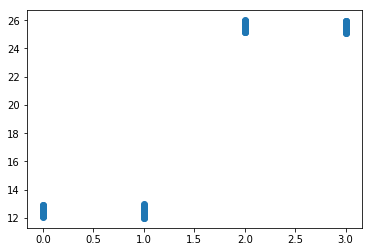

In [185]:
#Cat = 0  , Dog = 1, Woman = 3 , Man = 2
%matplotlib inline #Easy split at 1.5
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.scatter(df.Tips,df.Height)

In [186]:
the_tree.fit(np.expand_dims(df.Tips,axis =1 ),df.Height)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

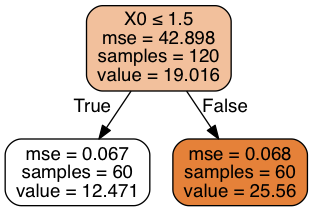

In [187]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(the_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [146]:
#Manual Label Encoding
my_df = [["Man",0] , ["Dog",1] , ["Cat",2] , ["Woman",3]]

In [147]:
my_df = np.array(my_df)

In [148]:
my_df.shape

(4, 2)

In [149]:
my_df = pd.DataFrame(my_df)

In [150]:
my_df.columns = ["Tips" , "Encoding"]

In [158]:
mergo = df_later.merge(my_df , how="left" , on= "Tips")

In [159]:
mergo

(120, 3)

[]

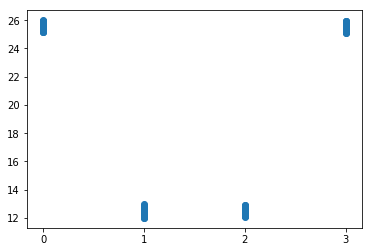

In [190]:
#Cat = 01 , Dog = 2, Woman = 3 , Man = 0
plt.figure(1) #No clear one shot split. Tree has 
plt.scatter(mergo.Encoding,df.Height)
plt.plot()

In [161]:
#Lulz effects of changing encoding in tree, depth one decision tree failed to get good split
#But will decision tree with more splits will get good one?  Yes.
fooled_tree = DecisionTreeRegressor(criterion='mse' , splitter = 'best' , max_depth = 1)

In [162]:
fooled_tree.fit(np.expand_dims(mergo.Encoding,1),mergo.Height)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

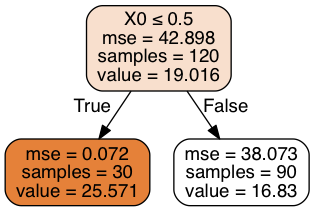

In [163]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(fooled_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [164]:
saved_tree = DecisionTreeRegressor(criterion='mse' , splitter = 'best' , max_depth = 2 , max_leaf_nodes=20 , min_impurity_decrease= 0)

In [165]:
saved_tree.fit(np.expand_dims(mergo.Encoding,1),mergo.Height)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

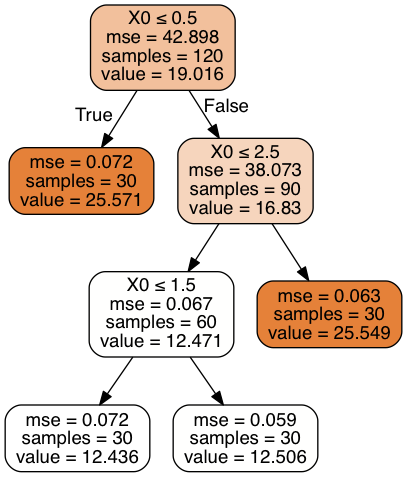

In [166]:
#my_df = [["Man",0] , ["Dog",1] , ["Cat",2] , ["Woman",3]]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(saved_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
plt.